# Glass Identification Project

## Import necessary Libaraies

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)

 * 1- building_windows_float_processed
 * 2- building_windows_non_float_processed
 * 3- vehicle_windows_float_processed
 * 4- vehicle_windows_non_float_processed (none in this database)
 * 5- containers
 * 6- tableware
 * 7- headlamps

## Import the dataset

In [120]:
# Import the csv to dataframe with names
df = pd.read_csv("glass.csv",names=["Id","RI" , "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"])

df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


This dataset contains the chemical properties of glass in which all are numerical data are present. Here "Type" is the target variable which contains multiclass so it will be termed as "Classification problem".

In [121]:
# Top five rows
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Exploratory Data Analysis (EDA)

In [122]:
# Checking dimensions of the dataset
df.shape

(214, 11)

This dataset contains 214 rows and 11 columns which 10 has features and one has target columns

In [123]:
# Checking the datatypes of each columns
df.dtypes

Id        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

This dataset contians all the columns has float64 datatypes and target columns has int datatypes.

In [124]:
# checking missing values
df.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

There are no missing values in the dataset

In [125]:
# Checking the each name of columns and its dtypes and its null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


This gives the brief about  the dataset which includes indexing type, columns type, no null values and memory usage.

### Check and remove duplicates

In [126]:
# Checking the duplicates
df.duplicated().sum()

0

This dataset contains no any duplicated.

In [127]:
# Checking no. of unique values in each columns
df.nunique()

Id      214
RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

There are the unique values present in the dataset. Let's remove it.

## Removing unwanted columns

In [128]:
# Remove id columns
df = df.drop(columns='Id',axis=1)

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [129]:
df.shape

(214, 10)

In [130]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64


Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64


Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64


Al
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64


Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: count, Length: 133, dtype: int64


K
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: count, Length: 65, dtype: int64


Ca

Its seems all the columns has continous values except target columns.

In [131]:
# Counting Number of Values Belonging to each class
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

## Statistics of Dataset

In [132]:
# Summarizing the distribution of the numerical variables.
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Above statistics shows that data is across all attributes is not in same range, so we will have to normalize the data first.

From the abiove description we can observe the following:-

 1. The counts of all the columns are same which means there are no missing values in the dataset.
 2. The data is the columns Potassium have mean value less than median which mmeans the data is skewed to left.
 3. By summarizing the data we can observe there is a huge differences between 75% and mex hence there are outliers present in the data.

## Data Visualization

### Univariate Analysis

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


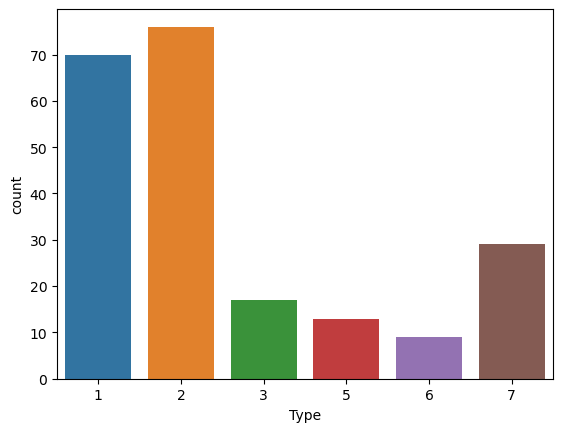

In [133]:
# Visualize the target variable
print(df['Type'].value_counts())
sns.countplot(x='Type',data=df)
plt.show()

As we can see The dataset is very very unbalanced.

**The occurrences of types 1 and 2 constitute more than 67 % of the glass types.**

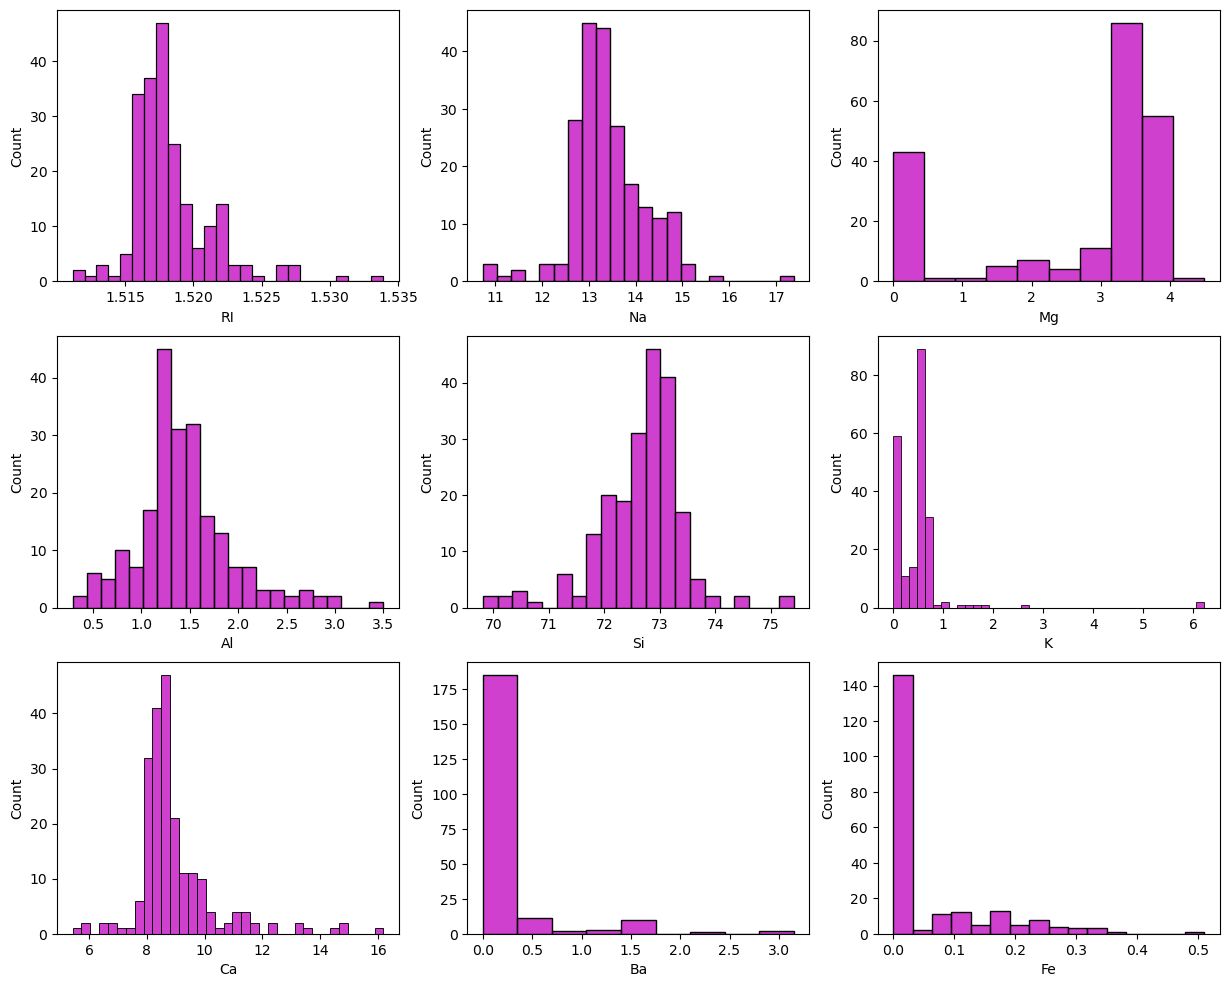

In [134]:
# Let's visualize all the columns using histplot
plt.figure(figsize=(15,12),facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(df[col],color='m')
        plt.xlabel(col,fontsize=10)
    plotnumber+=1
plt.show()

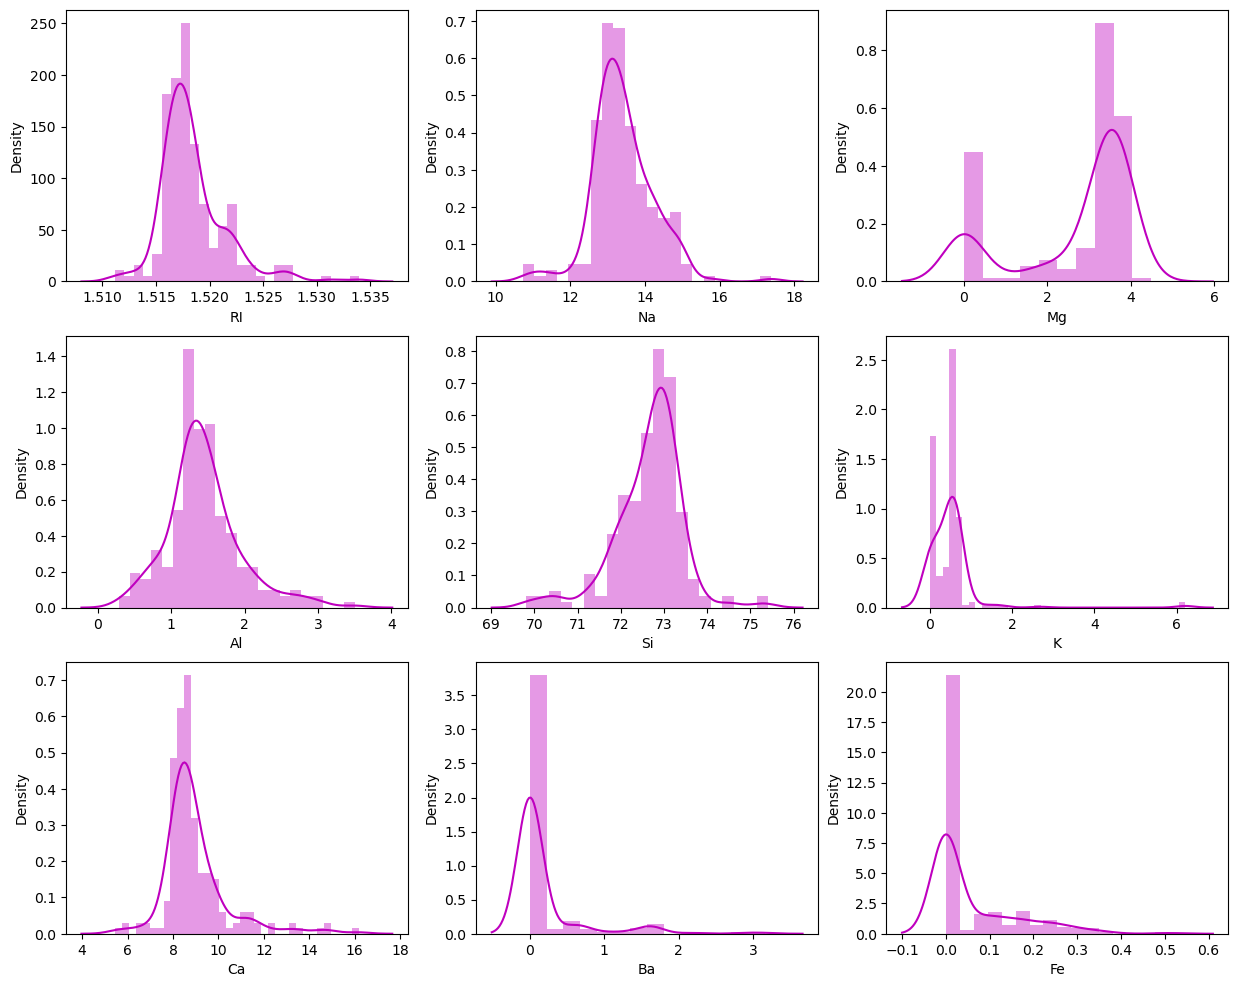

In [135]:
# Let's see how the data gas been distributed each numerical column
plt.figure(figsize=(15,12),facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=10)
    plotnumber+=1
plt.show()

From the abov distribution plots we can notic that the data almost looks normal in all the columns except Potassium, Calcium, Barium and Iron is skewed to the right.

## Bivariate Analysis

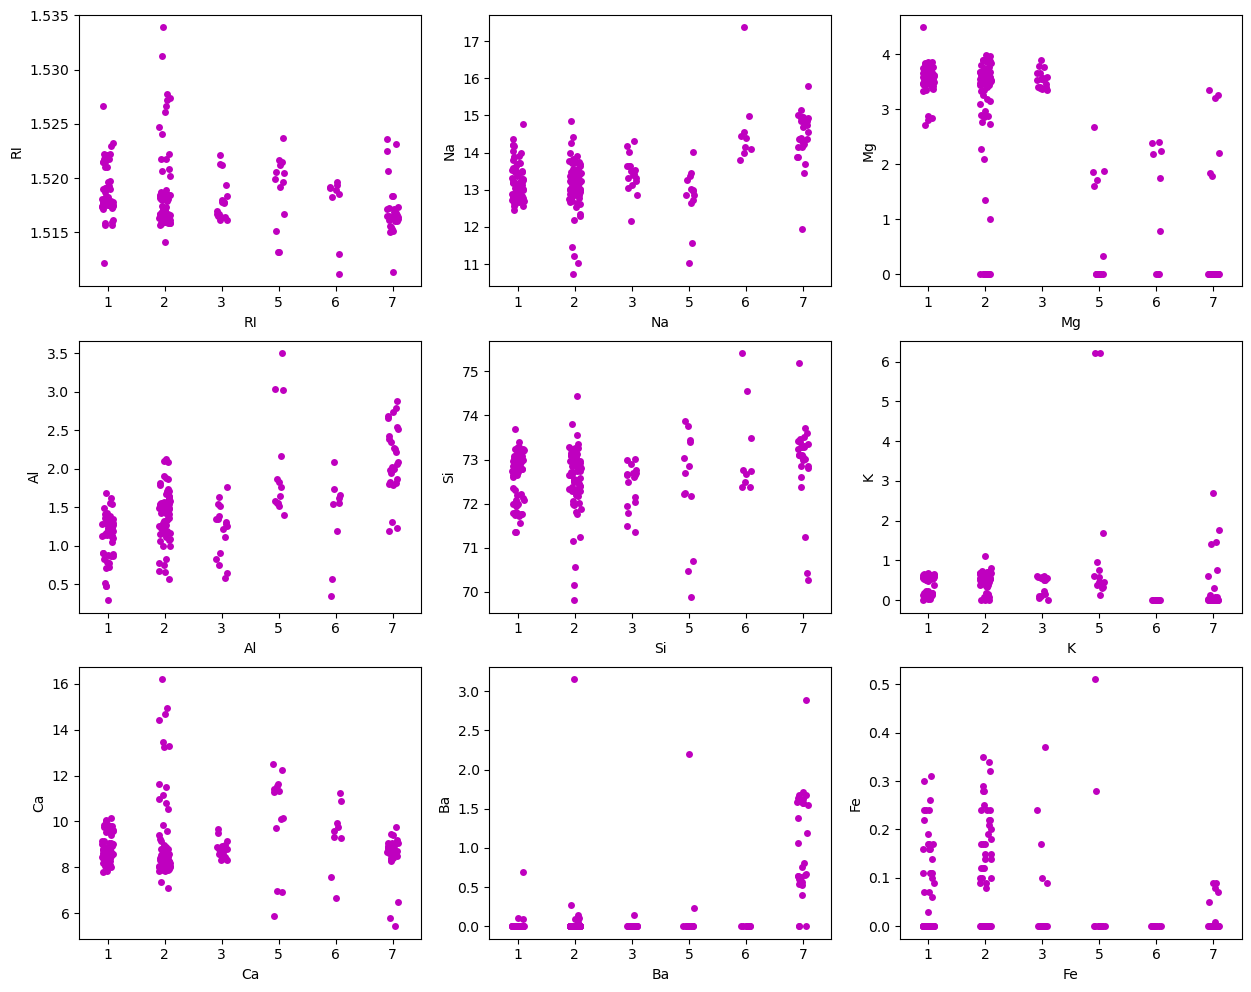

In [136]:
# Let's see how the data gas been distributed each numerical column
plt.figure(figsize=(15,12),facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y=col,x='Type',data=df,color='m')
        plt.xlabel(col,fontsize=10)
    plotnumber+=1
plt.show()

The relation ship between all features vs target variable it's seems good except Potassium and Barium.

## Multivariate Analysis

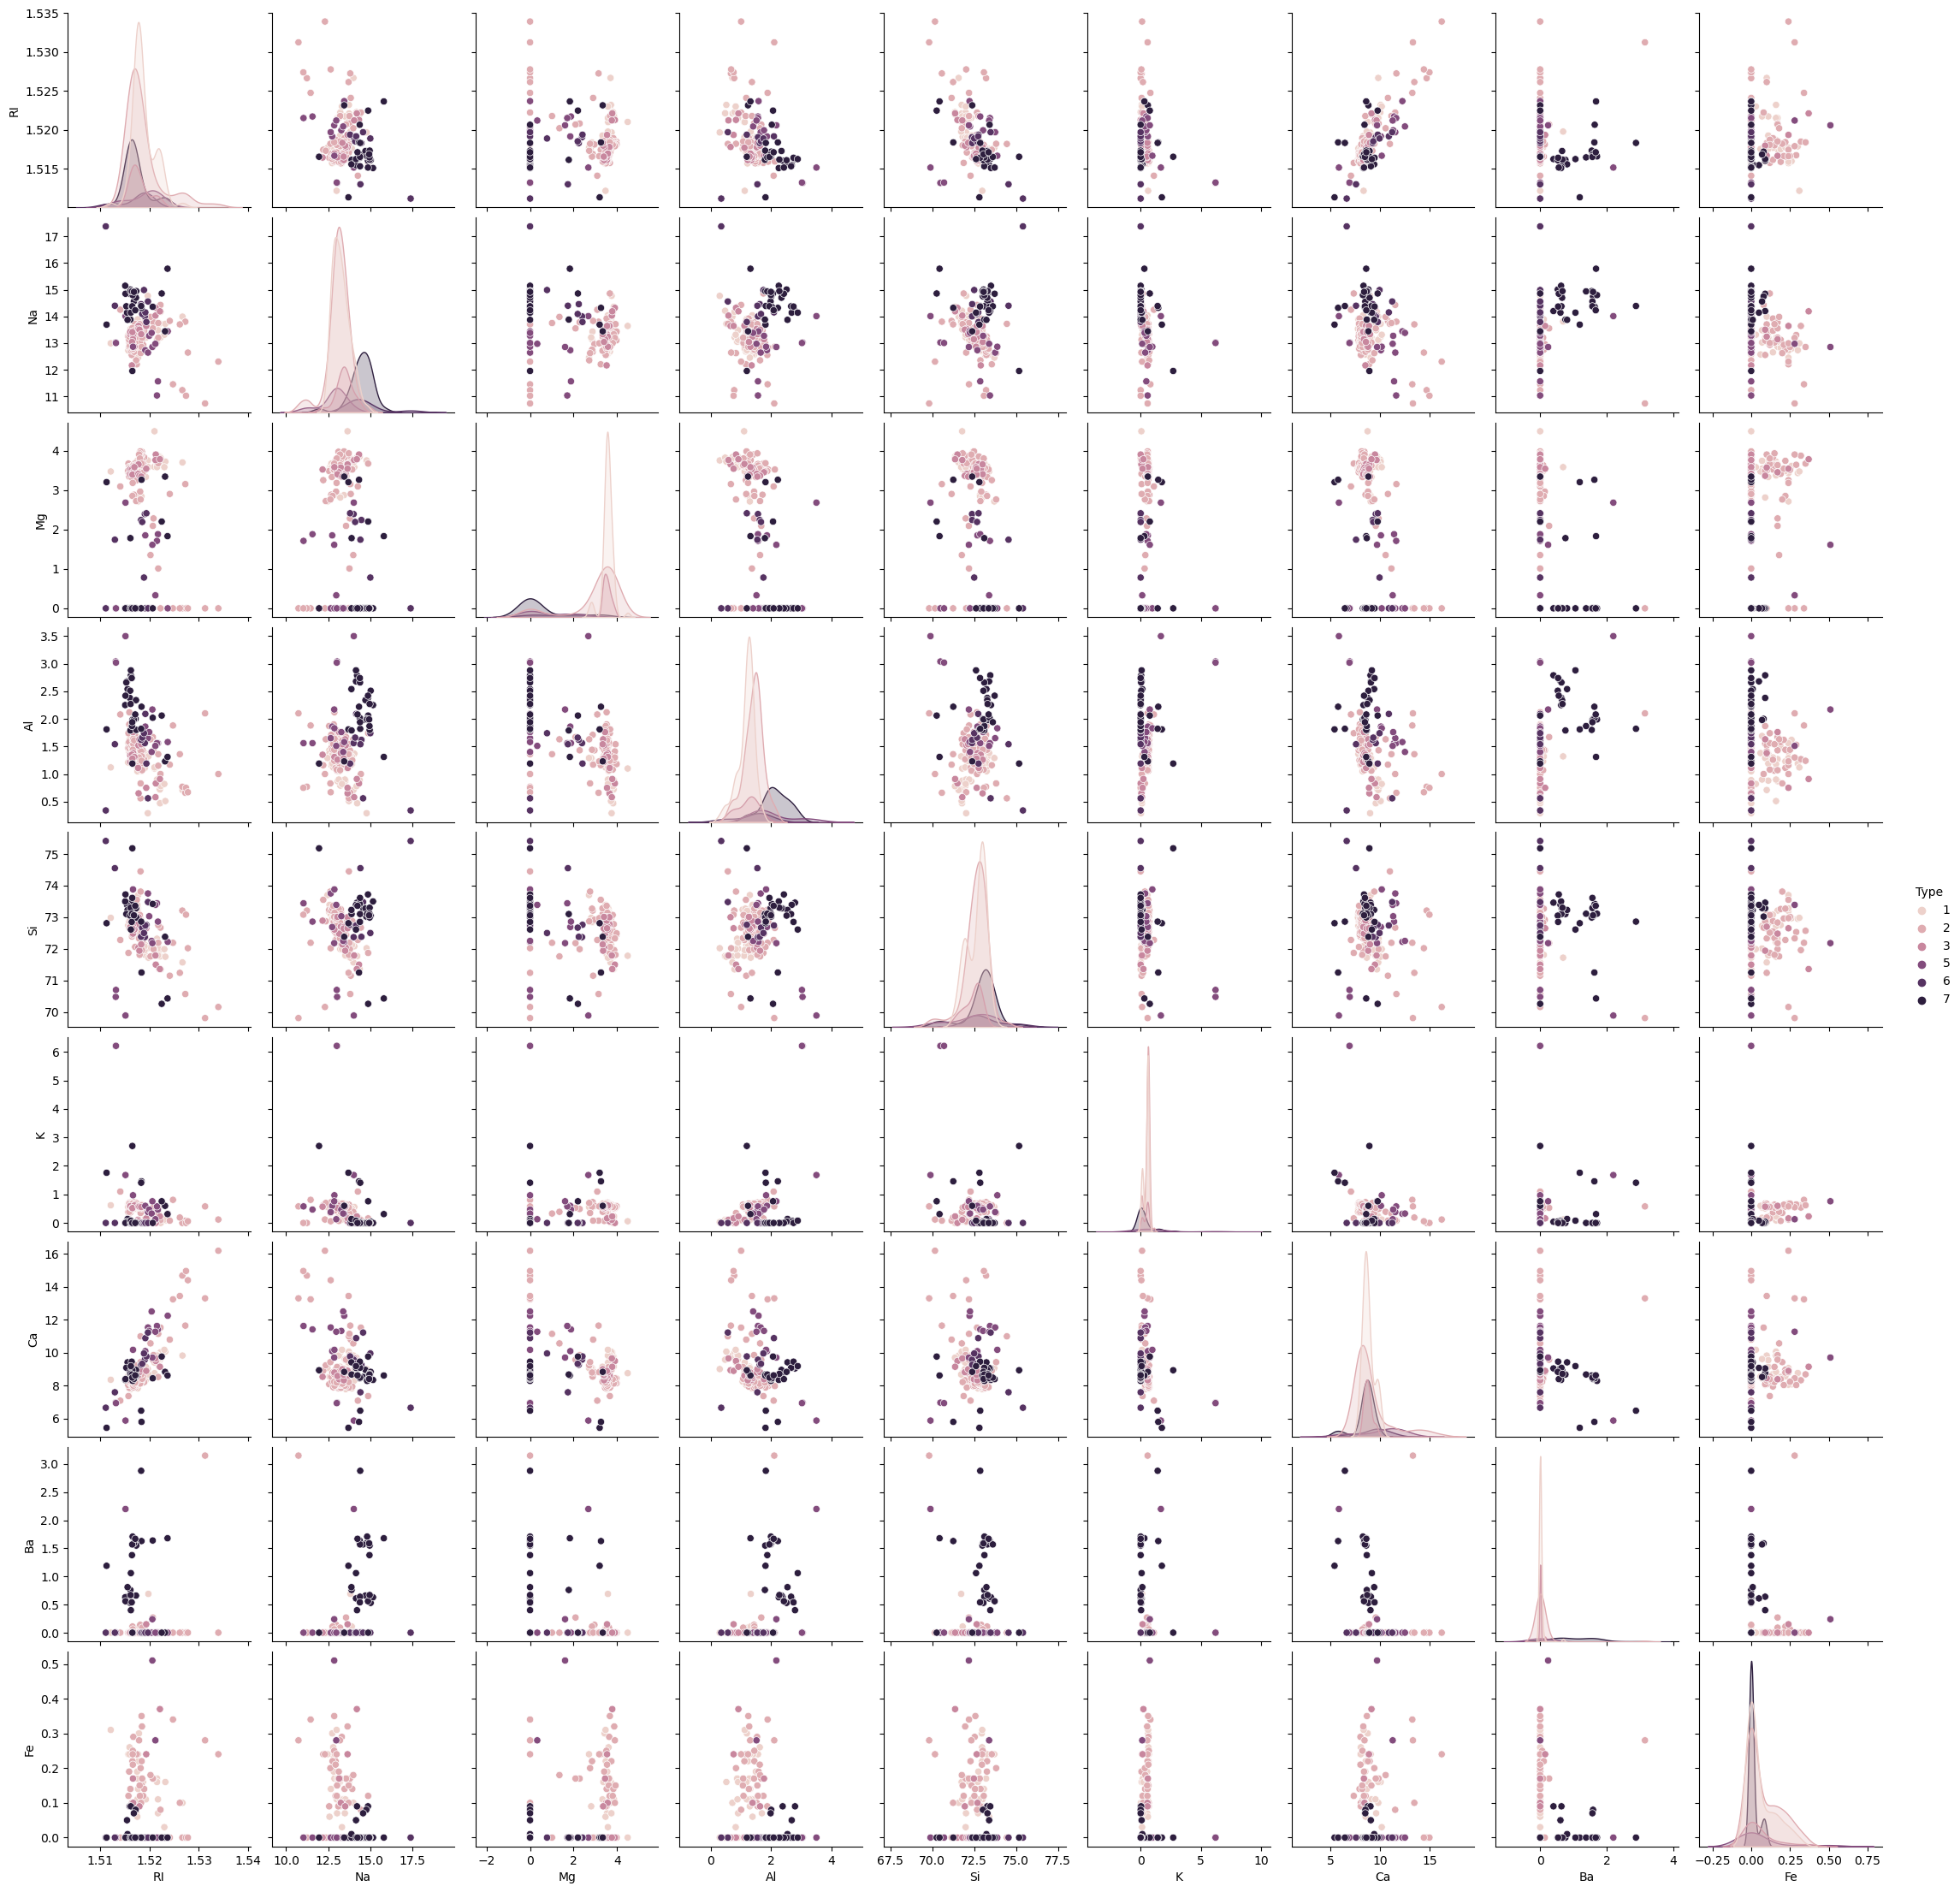

In [137]:
sns.pairplot(df,hue="Type")
plt.show()

The pairplot gives the pairwise relaiton between the features on the basis of the target "Type".

## Checking for outliers

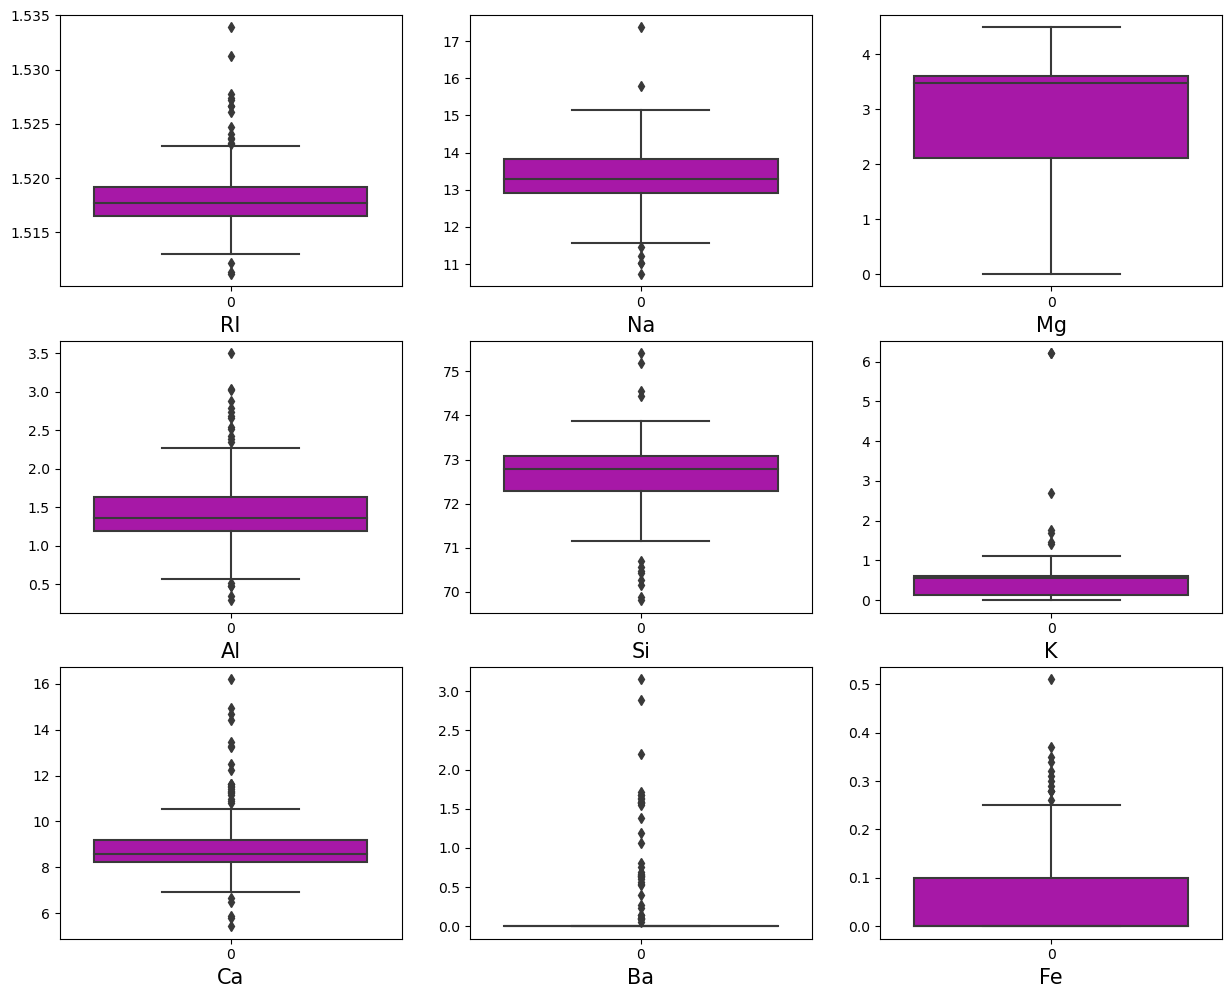

In [138]:
# Let's check the outlier's by plotting boxplot
plt.figure(figsize=(15,12),facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='m')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()

It'seem all the columns has outliers except Magnesium.

So we need to remove the outliers using zscore and IQR techniques before building the model and select the best one.

### Checking the outliers by using zscore method

In [139]:
# Finding the outliers using zscore mehtod (formula = x - mean/std)
from scipy.stats import zscore

df_features = df.drop('Type',axis=1)
z = np.abs(zscore(df_features))        # Apply the formula and get the scaled data
thersholds = 3
df1 = df[(z<3).all(axis=1)]           # Now removing the data above Zscore and creating new DataFrame

df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [140]:
# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df1.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df1.shape[0])/df.shape[0])*100)

Old Data Frame -  214
New Data Frame -  194

Data Loss Percentage After removing outliers with zscore method -
  9.345794392523365


It is affordable loss of data now we will check with IQR method

### Checking the outliers by using IQR metohd

In [141]:
# 1st quantile 
Q1 = df_features.quantile(0.25)

# 3rd quantile
Q3 = df_features.quantile(0.75)

#IQR
IQR = Q3 - Q1

df2 = df[~((df_features<(Q1 - 1.5 * IQR)) |(df_features>(Q3 + 1.5 * IQR))).any(axis=1)]

In [142]:
# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df2.shape[0])

print("\nData Loss Percentage After removing outliers with IQR method -\n ",((df.shape[0] - df2.shape[0])/df.shape[0])*100)

Old Data Frame -  214
New Data Frame -  136

Data Loss Percentage After removing outliers with IQR method -
  36.44859813084112


We use zscore method because its Loss less data then IQR method

### Checking how the data has been distributed in each column

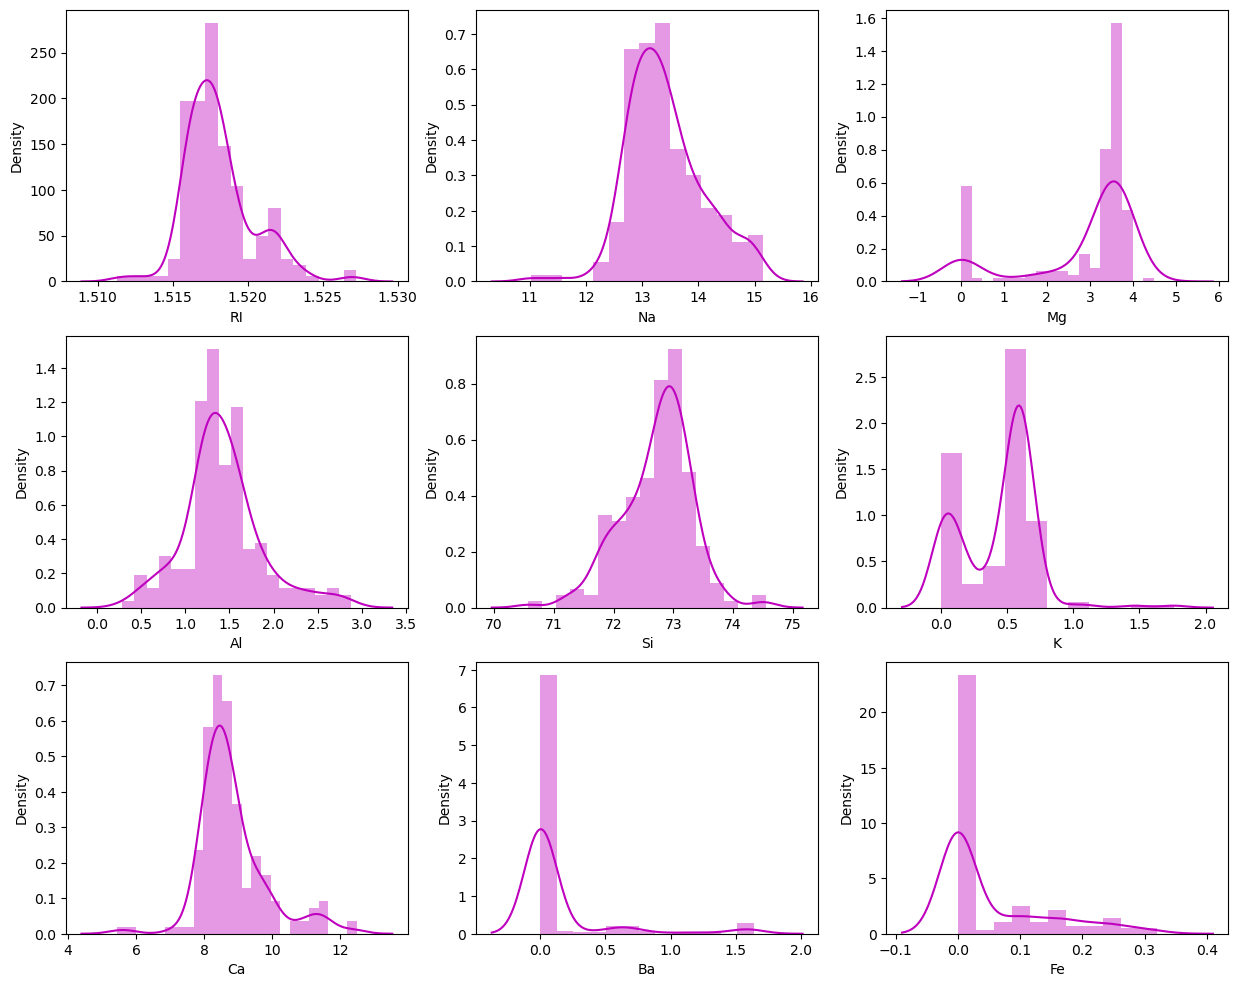

In [143]:
# Let's see how the data gas been distributed each numerical column
plt.figure(figsize=(15,12),facecolor='white')
plotnumber = 1

for col in df1:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[col],color='m')
        plt.xlabel(col,fontsize=10)
    plotnumber+=1
plt.show()

From the above distribution plots we can notice that the data almost looks normal in the some columns.

## Feature selection and Engineering

### 1. skewness

In [144]:
df1.skew()

RI      0.952733
Na      0.371482
Mg     -1.528849
Al      0.658259
Si     -0.425450
K       0.303175
Ca      1.077962
Ba      3.188587
Fe      1.486479
Type    1.284007
dtype: float64

The columns refractive index, Sodium, Magnesium, Aluminum,Silicon, Calcium, Barium and Iron these column are skewness need to transform.

**Transforming positive or right skew data using boxcox transformation**

In [145]:
df1['Fe'] = np.cbrt(df1['Fe'])

In [146]:
from scipy.stats import boxcox

In [147]:
df1['RI'] = boxcox(df1['RI'],-15)
df1['Mg'] = boxcox(df1['Mg'],5)
df1['Ba'] = boxcox(df1['Ba'],0.1)

**Other feature not able transform by boxcox method as they showing must be positive. So others columns are transform using yeo-johnson method.**

In [148]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson')
skew = ['Al','Ca']

df1[skew] = power.fit_transform(df1[skew])

In [149]:
print(df1['RI'].skew())
print(df1['Mg'].skew())
print(df1['Al'].skew())
print(df1['Ca'].skew())
print(df1['Ba'].skew())
print(df1['Fe'].skew())

0.0
0.12580966649704295
0.014042294835684126
-0.08173791603601305
1.9144192352693354
0.8831660954818821


In [150]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.066543,13.64,364.773810,-0.705895,71.78,0.06,0.001118,-10.0,0.0,1
1,0.066539,13.89,120.732352,-0.073256,72.73,0.48,-1.057157,-10.0,0.0,1
2,0.066537,13.53,112.564334,0.333353,72.99,0.39,-1.119780,-10.0,0.0,1
3,0.066539,13.21,136.623856,-0.237973,72.61,0.57,-0.587678,-10.0,0.0,1
4,0.066539,13.27,124.129117,-0.358065,73.08,0.55,-0.764376,-10.0,0.0,1


**All features skewness is now transform. But two feature are not in range of 0.5 to -0.5 so we checking all the metohd but not gives any better output**

In [151]:
df2 = df1.copy()

In [152]:
df2['Ba'] = np.sqrt(df2['Ba'])
print(df2['Ba'].skew())

df2['Fe'] = np.sqrt(df2['Fe'])
print(df2['Fe'].skew())

-1.8442162226716894
0.7923574171054133


In [153]:
df3 = df1.copy()

In [154]:
df3['Ba'] = np.cbrt(df3['Ba'])
print(df3['Ba'].skew())

df3['Fe'] = np.cbrt(df3['Fe'])
print(df3['Fe'].skew())

2.718412563247959
0.7723987247136596


In [155]:
df4 = df1.copy()

In [156]:
df4['Ba'] = np.log(df4['Ba'])
print(df4['Ba'].skew())

df4['Fe'] = np.log(df4['Fe'])
print(df4['Fe'].skew())

-2.211752388929041
nan


In [157]:
df5 = df1.copy()

In [158]:
df5['Ba'] = boxcox(df5['Ba'],0.5)
print(df2['Ba'].skew())

df5['Fe'] = boxcox(df5['Fe'],0.1)
print(df5['Fe'].skew())

-1.8442162226716894
0.7561651317047194


In [159]:
df6 = df1.copy()

In [160]:
power = PowerTransformer(method='yeo-johnson')
skew = ['Ba','Fe']

df6[skew] = power.fit_transform(df6[skew])

print(df6['Ba'].skew())
print(df6['Fe'].skew())

1.8718699310831701
0.7652918032709408


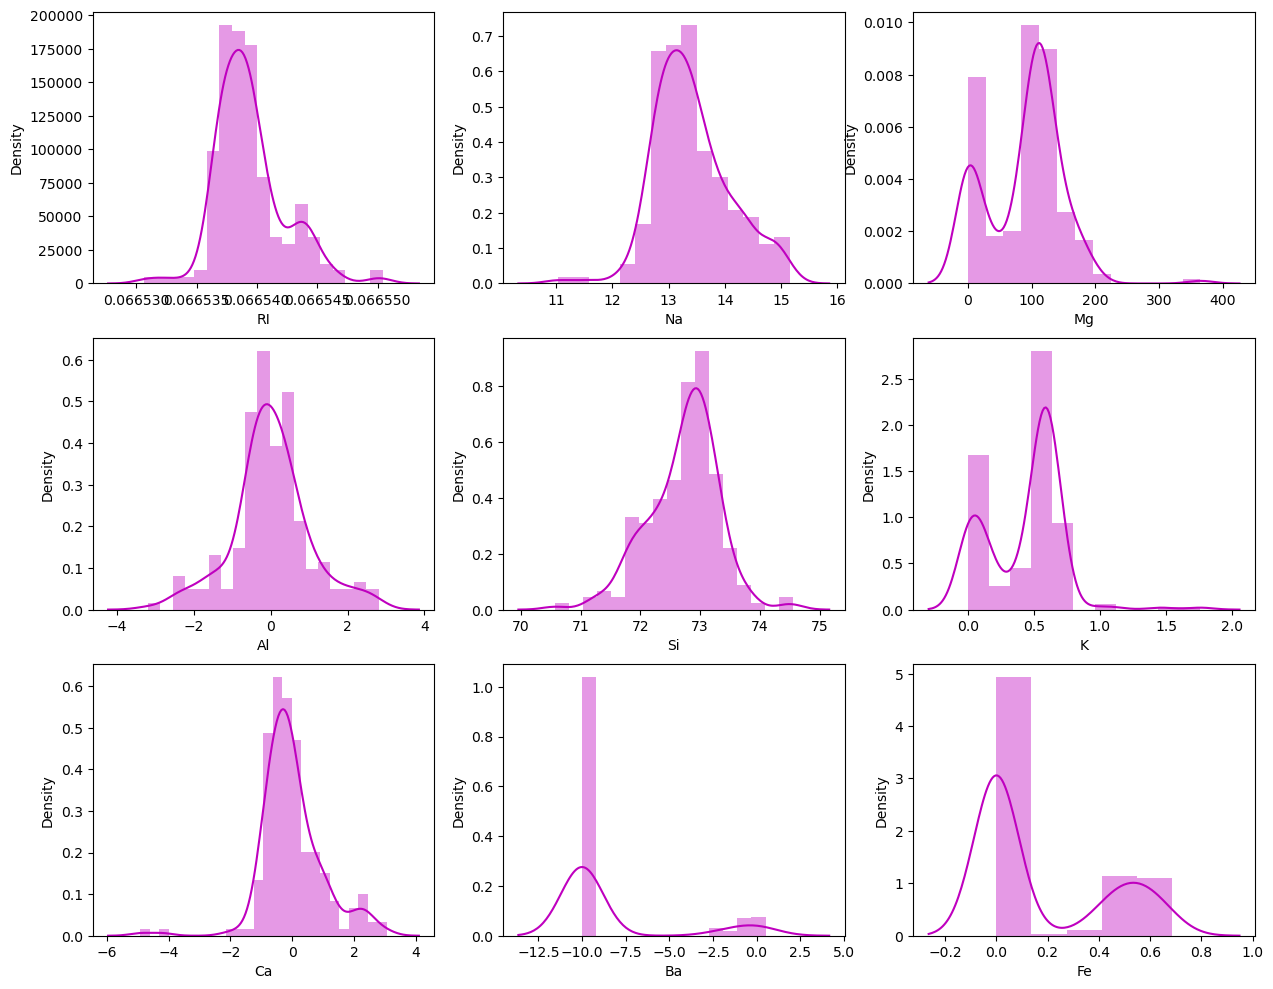

In [161]:
# Let's see how the data gas been distributed after removing skewness using transformation method
plt.figure(figsize=(15,12),facecolor='white')
plotnumber = 1

for col in df1:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[col],color='m')
        plt.xlabel(col,fontsize=10)
    plotnumber+=1
plt.show()

### 2.Correlation

In [162]:
corr = df1.corr()

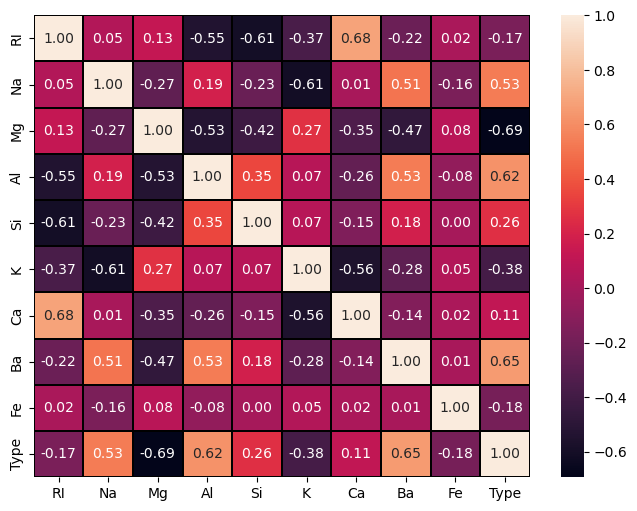

In [163]:
# Visualize the correlation using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,annot_kws={'size':10},linewidths=0.1,fmt='0.2f',linecolor='black')
plt.show()

The heatmap shows the correlation matrix by visualizing the data.

 1. The column Na,Al,Ba has positive correlation with target columns.
 2. The column Mg has negative correaltion with target columns.
 3. The column RI has negative correlation with Ai,AI columns.
 4. The column Na has negative correlation with K column and positive correlation with Ba.
 5. The column K has negative correlation with Ca columns.

<Axes: xlabel='Si', ylabel='Al'>

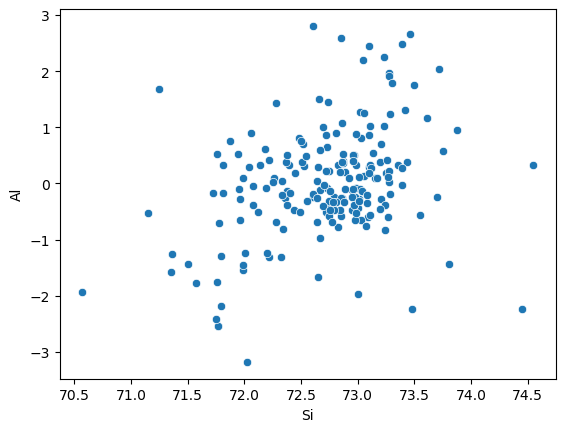

In [164]:
sns.scatterplot(x='Si',y='Al',data=df1)

<Axes: xlabel='Ca', ylabel='RI'>

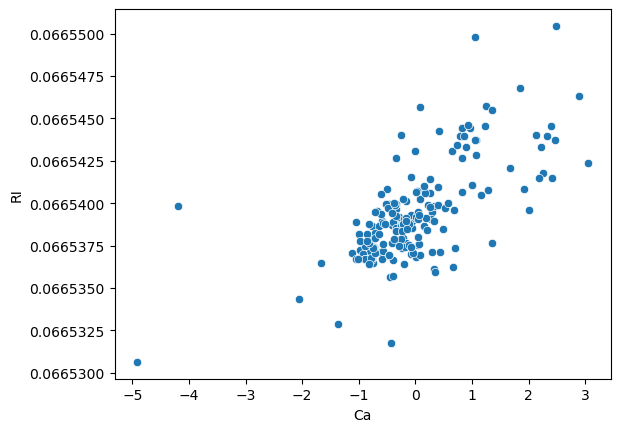

In [165]:
sns.scatterplot(x='Ca',y='RI',data=df1)

**We can observe the positive and negative correlated features using barplot.**

### Correlation with target column

In [166]:
# Visualize the correlation feature vs target 
corr['Type'].drop(['Type']).sort_values(ascending=False)

Ba    0.653875
Al    0.619820
Na    0.533025
Si    0.262152
Ca    0.110065
RI   -0.170222
Fe   -0.182102
K    -0.383499
Mg   -0.693576
Name: Type, dtype: float64

<Axes: >

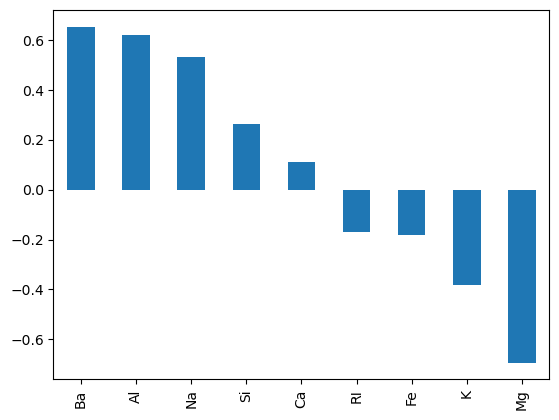

In [167]:
# Let's visualize it using barplot
corr['Type'].drop(['Type']).sort_values(ascending=False).plot(kind='bar')

In [168]:
x = df1.drop(columns=['Type'],axis=1)
y = df1['Type']

print("Features dimesnion :",x.shape)
print("Target dimesnion :",y.shape)

Features dimesnion : (194, 9)
Target dimesnion : (194,)


The features and target rows has are same.

## Label Binarization

In [169]:
y = y.apply(lambda y_value:1 if y_value>=5 else 0)

We convert muticlassfication to binary classification. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

 * 0 - window glass
 * 1 - non-window glass

Type
0    154
1     40
Name: count, dtype: int64


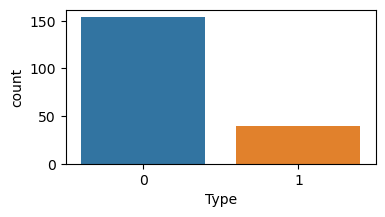

In [170]:
print(y.value_counts())
plt.figure(figsize=(4,2))
sns.countplot(x = y,data = df1)
plt.show()

We assume that after convert into binary classification the target data has inbalance. Let do it balance using oversampling.

## Oversampling

In [171]:
# Balance of inbalance data of target variable
from imblearn.over_sampling import SMOTE

SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

Type
0    154
1    154
Name: count, dtype: int64


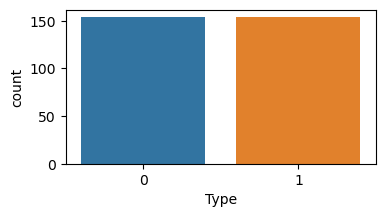

In [172]:
# Checking value count of target column
print(y1.value_counts())
plt.figure(figsize=(4,2))
sns.countplot(x = y1, data = df1)
plt.show()

Now the data is balanced.

In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif['VIF value'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]

vif

,Feature,VIF value
0,RI,49323.270362
1,Na,1750.015277
2,Mg,14.179186
3,Al,2.556863
4,Si,36254.437935
5,K,14.662459
6,Ca,4.661310
7,Ba,16.090465
8,Fe,1.599819
9,Type,9.815763


By Checkng VIF values we can find the features causing multicollineraity problem. check do StandardScaler and check again.

### Feature Scaling using Standard Scalarization

In [174]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

We have scaled the data using Standard Scalaization method to overcome the issue of biasness.

### Checking Variance Inflation Factor (VIF)

In [175]:
# Find the variance inflation factor in each scaled columns i.e x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x1.columns
vif['VIF value'] = [variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]

vif

,Feature,VIF value
0,RI,4.197943
1,Na,4.894039
2,Mg,4.523766
3,Al,3.485608
4,Si,2.856413
5,K,4.352488
6,Ca,5.650982
7,Ba,3.830545
8,Fe,1.085639


So, we has multicolinearity issue, We can now move ahead for model building.

# Model Building

In [176]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding Best Random state

In [177]:
maxAccu = 0
maxRs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25, random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    y_pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ", maxAccu*100,"at random_state", maxRs)  

Best accuracy is  100.0 at random_state 8


## Creating train test split

In [178]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=maxRs)

## Applying all Classification Model

In [179]:
LR  = LogisticRegression()
KNN = KNeighborsClassifier()
DT  = DecisionTreeClassifier()
ET  = ExtraTreeClassifier()
RFC = RandomForestClassifier()
BC  = BaggingClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
SVM = SVC(probability=True)
XGB = xgb.XGBClassifier()

models = {'LogisticRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFC,
         'Bagging':BC,'AdaBoost':ABC,'GradientBoosting':GBC,'SVC':SVM,'XGBoost':XGB}

In [180]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',name,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', acc_score)
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(y_test, y_pred))
    print('\n')
    print('=========================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression is


Accuracy Score :
 0.987012987012987


Confusion matrix : 
 [[41  1]
 [ 0 35]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.97      1.00      0.99        35

    accuracy                           0.99        77
   macro avg       0.99      0.99      0.99        77
weighted avg       0.99      0.99      0.99        77



Classification ML Algorithm Evaluation Matrix KNeighbors is


Accuracy Score :
 1.0


Confusion matrix : 
 [[42  0]
 [ 0 35]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        35

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



Classificati

In [182]:
for name,model in models.items():
    score = cross_val_score(model, x1, y1, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', name, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
        
    final = acc_score - score.mean()
    print('\n\033[1m'+'Different between Accuracy vs Cross Val Score:'+'\033[0m\n',final)
    
    print('===================================================================')



Cross Validation Score LogisticRegression :

Score : [0.98387097 0.98387097 0.98387097 0.83606557 0.98360656]
Mean Score : 0.9542570068746695

Different between Accuracy vs Cross Val Score:
 0.04574299312533048


Cross Validation Score KNeighbors :

Score : [0.98387097 1.         0.96774194 0.93442623 0.96721311]
Mean Score : 0.9706504494976202

Different between Accuracy vs Cross Val Score:
 0.02934955050237975


Cross Validation Score DecisionTree :

Score : [0.96774194 0.96774194 0.9516129  0.81967213 0.98360656]
Mean Score : 0.9380750925436278

Different between Accuracy vs Cross Val Score:
 0.06192490745637225


Cross Validation Score ExtraTree :

Score : [0.96774194 0.9516129  0.96774194 0.91803279 0.93442623]
Mean Score : 0.9479111581173983

Different between Accuracy vs Cross Val Score:
 0.052088841882601655


Cross Validation Score RandomForest :

Score : [0.98387097 1.         0.98387097 0.90163934 0.96721311]
Mean Score : 0.9673188789000529

Different between Accuracy vs C

Threshold of  LogisticRegression [           inf 9.99755902e-01 5.87189294e-01 2.67773846e-07]
Threshold of  KNeighbors [inf 1.  0.8 0. ]
Threshold of  DecisionTree [inf  1.  0.]
Threshold of  ExtraTree [inf  1.  0.]
Threshold of  RandomForest [ inf 1.   0.99 0.98 0.96 0.95 0.83 0.1  0.08 0.05 0.04 0.03 0.02 0.01
 0.  ]
Threshold of  Bagging [inf 1.  0.9 0.8 0.2 0.1 0. ]
Threshold of  AdaBoost [       inf 0.77964961 0.6906626  0.68457658 0.66863788 0.65792275
 0.6277664  0.62002536 0.60351408 0.59267834 0.57441052 0.56463439
 0.55107434 0.52611871 0.40764134 0.37776387 0.32384631 0.32097031
 0.30504396 0.30275604 0.30004957 0.29534255 0.27968235 0.27472826
 0.26867578 0.2627729  0.23208807 0.20446988 0.19770871 0.1803185 ]
Threshold of  GradientBoosting [           inf 9.99213470e-01 9.99098744e-01 9.98993100e-01
 9.98822677e-01 9.98002001e-01 9.97964981e-01 9.97811527e-01
 7.33258444e-01 1.68900555e-03 1.27681691e-03 1.11433717e-03
 8.37763650e-04 7.93148590e-04 1.76142355e-04]
Thresh

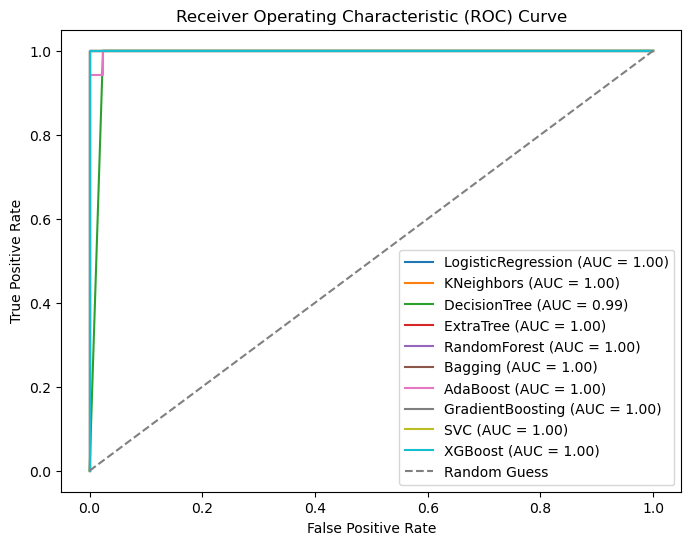

In [184]:
# Calculate the ROC curves and AUC scores for each model
plt.figure(figsize=(8,6))
for name,model in models.items():                 # Reading key and values from the items
    model.fit(x_train, y_train)                   # Each Model traning
    y_prob = model.predict_proba(x_test)[:, 1]    # Predict Prob of each model
    fpr, tpr,_ =roc_curve(y_test,y_prob)          # Finding False and True positive rate(' - ' is threshold)
    print('Threshold of ',name, _) 
    roc_auc = auc(fpr, tpr)                       # auc score of each model captured
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label = '{} (AUC = {:.2f})'.format(name, roc_auc))
    
# Add Labels and legend to the plot
plt.plot([0,1], [0,1], linestyle='--',color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Shiw the plot
plt.show()

**We can see that KneighborsClassifier gives less error between accuracy score and CrossValidation.**

Accuracy Score : 100 %
 
Cross Val Score : 0.9706504494976202

Different between Accuracy vs Cross Val Score:
0.02934955050237975

## Hyper Parameter Tuning : GridSearchCV

### Tune the parameter with KNeighborsClassifier model

In [185]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'algorithm' : ['kd_tree','brute'],
             'leaf_size'   :  [3,5,6,7,8],
             'n_neighbors'  :  [3,5,7,8,11,13],
             }

GCV = GridSearchCV(estimator = KNN, param_grid=param_grid)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Best estimator :  KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=7)


Best score :  0.9653098982423682


## Final Model

In [200]:
model = KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=7)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print('\033[1m'+' Final Model :' +'\033[0m')
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('\nConfusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

 Final Model :
Accuracy Score 1.0

Confusion matrix :
 [[42  0]
 [ 0 35]]

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        35

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



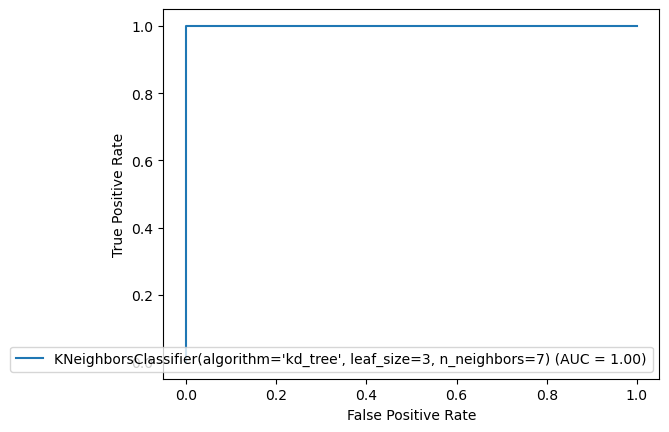

In [201]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name = model)
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 100%

## Saving the model

In [202]:
import joblib
joblib.dump(model,'Glass_Identification_Project.pkl')

['Glass_Identification_Project.pkl']

## Predicting the saved model

In [203]:
# Let's load the saved model and get the predictions
model = joblib.load("Glass_Identification_Project.pkl")

# Prediction 
prediction = model.predict(x_test)
prediction

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)